In [6]:
%matplotlib inline

import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import rosbag
import argparse
from cv_bridge import CvBridge, CvBridgeError

In [23]:
def process(path):
    """
    Preprocessing data for training
    
    - shift images to account for left camera bias 
    - random shadows and brightness 
    - reversal for opposite direction 
    - additional translation/rotations?
    """ 

    bridge = CvBridge()
    bag = rosbag.Bag(path)
    topics = [
        '/zed/rgb/image_rect_color',
        '/control_drive_parameters'
    ]

    angle = 0.0
    count = 0

    images = []
    labels = []

    for topic, message, timestamp in bag.read_messages(topics=topics):
        print('{}: [{}]: {}'.format(timestamp, topic, ''))
    
        if topic == '/zed/rgb/image_rect_color':
            count += 1
            
            try:
                image = bridge.imgmsg_to_cv2(message)

                # crop and resize
                image = image[188:, 0:672, 0:3]
                image = cv2.resize(image, (320, 160))

                # convert to grayscale
#                 weights = [1, 0, 0] # BGR (standard luminescence: [0.114, 0.587, 0.299])
#                 weights = np.array([weights]).reshape((1,3))
#                 image = cv2.transform(image, weights)

                print('[{}] message=({}, {}), shape=({})'.format(count, message.height, message.width, image.shape))

                images.append(image)
                labels.append(angle)
            except CvBridgeError as e:
                print(e)

        elif topic == '/control_drive_parameters':
            angle = message.angle
            
#         if count==5:
#             break


    bag.close()

    return np.array(images), np.array(labels)

In [24]:
images, labels = process("/home/vufuturetech/utilities/zed/data/2019-01-30-18-02-11.bag")

1548892932127249304: [/zed/rgb/image_rect_color]: 
[1] message=(720, 1280), shape=((160, 320, 3))
1548892932156771677: [/zed/rgb/image_rect_color]: 
[2] message=(720, 1280), shape=((160, 320, 3))
1548892932170538307: [/zed/rgb/image_rect_color]: 
[3] message=(720, 1280), shape=((160, 320, 3))
1548892932205802532: [/zed/rgb/image_rect_color]: 
[4] message=(720, 1280), shape=((160, 320, 3))
1548892932215586099: [/zed/rgb/image_rect_color]: 
[5] message=(720, 1280), shape=((160, 320, 3))
1548892932224757762: [/zed/rgb/image_rect_color]: 
[6] message=(720, 1280), shape=((160, 320, 3))
1548892932236184798: [/zed/rgb/image_rect_color]: 
[7] message=(720, 1280), shape=((160, 320, 3))
1548892932249765932: [/zed/rgb/image_rect_color]: 
[8] message=(720, 1280), shape=((160, 320, 3))
1548892932268109449: [/zed/rgb/image_rect_color]: 
[9] message=(720, 1280), shape=((160, 320, 3))
1548892932280635629: [/zed/rgb/image_rect_color]: 
[10] message=(720, 1280), shape=((160, 320, 3))
1548892932295235432

[89] message=(720, 1280), shape=((160, 320, 3))
1548892933738169645: [/control_drive_parameters]: 
1548892933750911315: [/zed/rgb/image_rect_color]: 
[90] message=(720, 1280), shape=((160, 320, 3))
1548892933752862098: [/zed/rgb/image_rect_color]: 
[91] message=(720, 1280), shape=((160, 320, 3))
1548892933768953266: [/zed/rgb/image_rect_color]: 
[92] message=(720, 1280), shape=((160, 320, 3))
1548892933769377117: [/control_drive_parameters]: 
1548892933783948809: [/zed/rgb/image_rect_color]: 
[93] message=(720, 1280), shape=((160, 320, 3))
1548892933787699247: [/control_drive_parameters]: 
1548892933820941882: [/zed/rgb/image_rect_color]: 
[94] message=(720, 1280), shape=((160, 320, 3))
1548892933835008607: [/control_drive_parameters]: 
1548892933835147640: [/control_drive_parameters]: 
1548892933852508441: [/zed/rgb/image_rect_color]: 
[95] message=(720, 1280), shape=((160, 320, 3))
1548892933857356616: [/zed/rgb/image_rect_color]: 
[96] message=(720, 1280), shape=((160, 320, 3))
1548

[170] message=(720, 1280), shape=((160, 320, 3))
1548892935293429686: [/control_drive_parameters]: 
1548892935305973504: [/zed/rgb/image_rect_color]: 
[171] message=(720, 1280), shape=((160, 320, 3))
1548892935317833612: [/control_drive_parameters]: 
1548892935323468928: [/zed/rgb/image_rect_color]: 
[172] message=(720, 1280), shape=((160, 320, 3))
1548892935333875376: [/zed/rgb/image_rect_color]: 
[173] message=(720, 1280), shape=((160, 320, 3))
1548892935357018914: [/zed/rgb/image_rect_color]: 
[174] message=(720, 1280), shape=((160, 320, 3))
1548892935367348631: [/zed/rgb/image_rect_color]: 
[175] message=(720, 1280), shape=((160, 320, 3))
1548892935382836117: [/zed/rgb/image_rect_color]: 
[176] message=(720, 1280), shape=((160, 320, 3))
1548892935387426587: [/control_drive_parameters]: 
1548892935400727873: [/zed/rgb/image_rect_color]: 
[177] message=(720, 1280), shape=((160, 320, 3))
1548892935413354824: [/zed/rgb/image_rect_color]: 
[178] message=(720, 1280), shape=((160, 320, 3)

1548892936480006205: [/zed/rgb/image_rect_color]: 
[237] message=(720, 1280), shape=((160, 320, 3))
1548892936485666421: [/control_drive_parameters]: 
1548892936495984629: [/control_drive_parameters]: 
1548892936517282805: [/control_drive_parameters]: 
1548892936521358871: [/zed/rgb/image_rect_color]: 
[238] message=(720, 1280), shape=((160, 320, 3))
1548892936542303496: [/zed/rgb/image_rect_color]: 
[239] message=(720, 1280), shape=((160, 320, 3))
1548892936553495871: [/control_drive_parameters]: 
1548892936553514590: [/control_drive_parameters]: 
1548892936556897120: [/zed/rgb/image_rect_color]: 
[240] message=(720, 1280), shape=((160, 320, 3))
1548892936571201606: [/zed/rgb/image_rect_color]: 
[241] message=(720, 1280), shape=((160, 320, 3))
1548892936593598963: [/zed/rgb/image_rect_color]: 
[242] message=(720, 1280), shape=((160, 320, 3))
1548892936596555689: [/control_drive_parameters]: 
1548892936610769875: [/zed/rgb/image_rect_color]: 
[243] message=(720, 1280), shape=((160, 320

1548892937869879555: [/zed/rgb/image_rect_color]: 
[306] message=(720, 1280), shape=((160, 320, 3))
1548892937887101939: [/zed/rgb/image_rect_color]: 
[307] message=(720, 1280), shape=((160, 320, 3))
1548892937899367780: [/zed/rgb/image_rect_color]: 
[308] message=(720, 1280), shape=((160, 320, 3))
1548892937926583564: [/zed/rgb/image_rect_color]: 
[309] message=(720, 1280), shape=((160, 320, 3))
1548892937943566535: [/zed/rgb/image_rect_color]: 
[310] message=(720, 1280), shape=((160, 320, 3))
1548892937959757670: [/control_drive_parameters]: 
1548892937978846432: [/zed/rgb/image_rect_color]: 
[311] message=(720, 1280), shape=((160, 320, 3))
1548892938002104701: [/zed/rgb/image_rect_color]: 
[312] message=(720, 1280), shape=((160, 320, 3))
1548892938015246967: [/zed/rgb/image_rect_color]: 
[313] message=(720, 1280), shape=((160, 320, 3))
1548892938033776638: [/zed/rgb/image_rect_color]: 
[314] message=(720, 1280), shape=((160, 320, 3))
1548892938049346856: [/zed/rgb/image_rect_color]:

1548892941191020223: [/zed/rgb/image_rect_color]: 
[381] message=(720, 1280), shape=((160, 320, 3))
1548892941363970260: [/control_drive_parameters]: 
1548892941376707491: [/zed/rgb/image_rect_color]: 
[382] message=(720, 1280), shape=((160, 320, 3))
1548892941632597734: [/zed/rgb/image_rect_color]: 
[383] message=(720, 1280), shape=((160, 320, 3))
1548892941914187357: [/control_drive_parameters]: 
1548892941929474499: [/control_drive_parameters]: 
1548892941947491447: [/zed/rgb/image_rect_color]: 
[384] message=(720, 1280), shape=((160, 320, 3))
1548892942165685403: [/control_drive_parameters]: 
1548892942175967930: [/zed/rgb/image_rect_color]: 
[385] message=(720, 1280), shape=((160, 320, 3))
1548892942399980902: [/control_drive_parameters]: 
1548892942417291880: [/zed/rgb/image_rect_color]: 
[386] message=(720, 1280), shape=((160, 320, 3))
1548892942684361443: [/control_drive_parameters]: 
1548892942693526992: [/zed/rgb/image_rect_color]: 
[387] message=(720, 1280), shape=((160, 320

1548892968251040724: [/zed/rgb/image_rect_color]: 
[444] message=(720, 1280), shape=((160, 320, 3))
1548892968577826865: [/zed/rgb/image_rect_color]: 
[445] message=(720, 1280), shape=((160, 320, 3))
1548892968883804887: [/control_drive_parameters]: 
1548892968897395787: [/zed/rgb/image_rect_color]: 
[446] message=(720, 1280), shape=((160, 320, 3))
1548892969185689556: [/control_drive_parameters]: 
1548892969202827000: [/control_drive_parameters]: 
1548892969208919539: [/zed/rgb/image_rect_color]: 
[447] message=(720, 1280), shape=((160, 320, 3))
1548892969435602734: [/control_drive_parameters]: 
1548892969441214065: [/zed/rgb/image_rect_color]: 
[448] message=(720, 1280), shape=((160, 320, 3))
1548892969638872140: [/control_drive_parameters]: 
1548892969648194706: [/zed/rgb/image_rect_color]: 
[449] message=(720, 1280), shape=((160, 320, 3))
1548892969886456045: [/zed/rgb/image_rect_color]: 
[450] message=(720, 1280), shape=((160, 320, 3))
1548892970120329323: [/zed/rgb/image_rect_col

[501] message=(720, 1280), shape=((160, 320, 3))
1548892980204476422: [/control_drive_parameters]: 
1548892980205839099: [/zed/rgb/image_rect_color]: 
[502] message=(720, 1280), shape=((160, 320, 3))
1548892980352488882: [/control_drive_parameters]: 
1548892980352510258: [/control_drive_parameters]: 
1548892980354920734: [/zed/rgb/image_rect_color]: 
[503] message=(720, 1280), shape=((160, 320, 3))
1548892980504932953: [/control_drive_parameters]: 
1548892980510208590: [/zed/rgb/image_rect_color]: 
[504] message=(720, 1280), shape=((160, 320, 3))
1548892980670340088: [/control_drive_parameters]: 
1548892980678065977: [/zed/rgb/image_rect_color]: 
[505] message=(720, 1280), shape=((160, 320, 3))
1548892980838725118: [/zed/rgb/image_rect_color]: 
[506] message=(720, 1280), shape=((160, 320, 3))
1548892980995121125: [/zed/rgb/image_rect_color]: 
[507] message=(720, 1280), shape=((160, 320, 3))
1548892981213908393: [/zed/rgb/image_rect_color]: 
[508] message=(720, 1280), shape=((160, 320, 

[559] message=(720, 1280), shape=((160, 320, 3))
1548892988421052636: [/control_drive_parameters]: 
1548892988429442631: [/zed/rgb/image_rect_color]: 
[560] message=(720, 1280), shape=((160, 320, 3))
1548892988552003481: [/zed/rgb/image_rect_color]: 
[561] message=(720, 1280), shape=((160, 320, 3))
1548892988679197344: [/zed/rgb/image_rect_color]: 
[562] message=(720, 1280), shape=((160, 320, 3))
1548892988784657339: [/zed/rgb/image_rect_color]: 
[563] message=(720, 1280), shape=((160, 320, 3))
1548892988907102733: [/zed/rgb/image_rect_color]: 
[564] message=(720, 1280), shape=((160, 320, 3))
1548892989001829572: [/zed/rgb/image_rect_color]: 
[565] message=(720, 1280), shape=((160, 320, 3))
1548892989141938247: [/zed/rgb/image_rect_color]: 
[566] message=(720, 1280), shape=((160, 320, 3))
1548892989270642146: [/zed/rgb/image_rect_color]: 
[567] message=(720, 1280), shape=((160, 320, 3))
1548892989371587662: [/control_drive_parameters]: 
1548892989380560671: [/zed/rgb/image_rect_color]:

[618] message=(720, 1280), shape=((160, 320, 3))
1548892997480492745: [/control_drive_parameters]: 
1548892997485879516: [/zed/rgb/image_rect_color]: 
[619] message=(720, 1280), shape=((160, 320, 3))
1548892997603591928: [/control_drive_parameters]: 
1548892997620813109: [/zed/rgb/image_rect_color]: 
[620] message=(720, 1280), shape=((160, 320, 3))
1548892997853133379: [/control_drive_parameters]: 
1548892997853952710: [/zed/rgb/image_rect_color]: 
[621] message=(720, 1280), shape=((160, 320, 3))
1548892997982554857: [/control_drive_parameters]: 
1548892997988666014: [/control_drive_parameters]: 
1548892997991836169: [/zed/rgb/image_rect_color]: 
[622] message=(720, 1280), shape=((160, 320, 3))
1548892998152564186: [/control_drive_parameters]: 
1548892998176165404: [/zed/rgb/image_rect_color]: 
[623] message=(720, 1280), shape=((160, 320, 3))
1548892998286867559: [/zed/rgb/image_rect_color]: 
[624] message=(720, 1280), shape=((160, 320, 3))
1548892998465456138: [/zed/rgb/image_rect_col

1548893005882901592: [/zed/rgb/image_rect_color]: 
[675] message=(720, 1280), shape=((160, 320, 3))
1548893006011196987: [/control_drive_parameters]: 
1548893006019603527: [/zed/rgb/image_rect_color]: 
[676] message=(720, 1280), shape=((160, 320, 3))
1548893006179999989: [/zed/rgb/image_rect_color]: 
[677] message=(720, 1280), shape=((160, 320, 3))
1548893006292472913: [/control_drive_parameters]: 
1548893006303835064: [/zed/rgb/image_rect_color]: 
[678] message=(720, 1280), shape=((160, 320, 3))
1548893006495419009: [/zed/rgb/image_rect_color]: 
[679] message=(720, 1280), shape=((160, 320, 3))
1548893006638075599: [/control_drive_parameters]: 
1548893006654359619: [/control_drive_parameters]: 
1548893006670469813: [/zed/rgb/image_rect_color]: 
[680] message=(720, 1280), shape=((160, 320, 3))
1548893006805017945: [/control_drive_parameters]: 
1548893006818930391: [/zed/rgb/image_rect_color]: 
[681] message=(720, 1280), shape=((160, 320, 3))
1548893006979578887: [/control_drive_paramete

1548893014480571455: [/zed/rgb/image_rect_color]: 
[733] message=(720, 1280), shape=((160, 320, 3))
1548893014621757964: [/zed/rgb/image_rect_color]: 
[734] message=(720, 1280), shape=((160, 320, 3))
1548893014725612089: [/zed/rgb/image_rect_color]: 
[735] message=(720, 1280), shape=((160, 320, 3))
1548893014830727768: [/zed/rgb/image_rect_color]: 
[736] message=(720, 1280), shape=((160, 320, 3))
1548893015007998997: [/zed/rgb/image_rect_color]: 
[737] message=(720, 1280), shape=((160, 320, 3))
1548893015112509287: [/zed/rgb/image_rect_color]: 
[738] message=(720, 1280), shape=((160, 320, 3))
1548893015230005617: [/zed/rgb/image_rect_color]: 
[739] message=(720, 1280), shape=((160, 320, 3))
1548893015350121824: [/zed/rgb/image_rect_color]: 
[740] message=(720, 1280), shape=((160, 320, 3))
1548893015502371034: [/zed/rgb/image_rect_color]: 
[741] message=(720, 1280), shape=((160, 320, 3))
1548893015688890427: [/zed/rgb/image_rect_color]: 
[742] message=(720, 1280), shape=((160, 320, 3))


1548893024397854401: [/zed/rgb/image_rect_color]: 
[800] message=(720, 1280), shape=((160, 320, 3))
1548893024559406508: [/zed/rgb/image_rect_color]: 
[801] message=(720, 1280), shape=((160, 320, 3))
1548893024649558628: [/zed/rgb/image_rect_color]: 
[802] message=(720, 1280), shape=((160, 320, 3))
1548893024830609602: [/zed/rgb/image_rect_color]: 
[803] message=(720, 1280), shape=((160, 320, 3))
1548893024993516327: [/control_drive_parameters]: 
1548893025001528831: [/zed/rgb/image_rect_color]: 
[804] message=(720, 1280), shape=((160, 320, 3))
1548893025124313956: [/control_drive_parameters]: 
1548893025140570211: [/control_drive_parameters]: 
1548893025147358664: [/zed/rgb/image_rect_color]: 
[805] message=(720, 1280), shape=((160, 320, 3))
1548893025359397443: [/control_drive_parameters]: 
1548893025360513145: [/zed/rgb/image_rect_color]: 
[806] message=(720, 1280), shape=((160, 320, 3))
1548893025542188833: [/zed/rgb/image_rect_color]: 
[807] message=(720, 1280), shape=((160, 320, 

1548893034041734706: [/zed/rgb/image_rect_color]: 
[863] message=(720, 1280), shape=((160, 320, 3))
1548893034173730202: [/zed/rgb/image_rect_color]: 
[864] message=(720, 1280), shape=((160, 320, 3))
1548893034304063290: [/zed/rgb/image_rect_color]: 
[865] message=(720, 1280), shape=((160, 320, 3))
1548893034429581254: [/control_drive_parameters]: 
1548893034437754987: [/zed/rgb/image_rect_color]: 
[866] message=(720, 1280), shape=((160, 320, 3))
1548893034507544314: [/control_drive_parameters]: 
1548893034531396024: [/control_drive_parameters]: 
1548893034542111098: [/control_drive_parameters]: 
1548893034543333271: [/zed/rgb/image_rect_color]: 
[867] message=(720, 1280), shape=((160, 320, 3))
1548893034644865826: [/control_drive_parameters]: 
1548893034647849610: [/zed/rgb/image_rect_color]: 
[868] message=(720, 1280), shape=((160, 320, 3))
1548893034769432855: [/zed/rgb/image_rect_color]: 
[869] message=(720, 1280), shape=((160, 320, 3))
1548893034881769254: [/zed/rgb/image_rect_col

1548893043070259881: [/zed/rgb/image_rect_color]: 
[925] message=(720, 1280), shape=((160, 320, 3))
1548893043311496705: [/control_drive_parameters]: 
1548893043322558682: [/zed/rgb/image_rect_color]: 
[926] message=(720, 1280), shape=((160, 320, 3))
1548893043488830990: [/control_drive_parameters]: 
1548893043499109584: [/control_drive_parameters]: 
1548893043504160991: [/zed/rgb/image_rect_color]: 
[927] message=(720, 1280), shape=((160, 320, 3))
1548893043661275025: [/control_drive_parameters]: 
1548893043675416640: [/zed/rgb/image_rect_color]: 
[928] message=(720, 1280), shape=((160, 320, 3))
1548893043811397854: [/control_drive_parameters]: 
1548893043821279125: [/zed/rgb/image_rect_color]: 
[929] message=(720, 1280), shape=((160, 320, 3))
1548893044009372722: [/zed/rgb/image_rect_color]: 
[930] message=(720, 1280), shape=((160, 320, 3))
1548893044236173559: [/control_drive_parameters]: 
1548893044245933551: [/zed/rgb/image_rect_color]: 
[931] message=(720, 1280), shape=((160, 320

[982] message=(720, 1280), shape=((160, 320, 3))
1548893051474488802: [/zed/rgb/image_rect_color]: 
[983] message=(720, 1280), shape=((160, 320, 3))
1548893051646438410: [/control_drive_parameters]: 
1548893051651433928: [/zed/rgb/image_rect_color]: 
[984] message=(720, 1280), shape=((160, 320, 3))
1548893051866335073: [/control_drive_parameters]: 
1548893051866749518: [/zed/rgb/image_rect_color]: 
[985] message=(720, 1280), shape=((160, 320, 3))
1548893052011405017: [/control_drive_parameters]: 
1548893052019449371: [/zed/rgb/image_rect_color]: 
[986] message=(720, 1280), shape=((160, 320, 3))
1548893052184960220: [/control_drive_parameters]: 
1548893052189092032: [/zed/rgb/image_rect_color]: 
[987] message=(720, 1280), shape=((160, 320, 3))
1548893052302208015: [/control_drive_parameters]: 
1548893052306249105: [/zed/rgb/image_rect_color]: 
[988] message=(720, 1280), shape=((160, 320, 3))
1548893052364885995: [/control_drive_parameters]: 
1548893052377562722: [/zed/rgb/image_rect_col

1548893060468788034: [/zed/rgb/image_rect_color]: 
[1044] message=(720, 1280), shape=((160, 320, 3))
1548893060671519291: [/zed/rgb/image_rect_color]: 
[1045] message=(720, 1280), shape=((160, 320, 3))
1548893060864850184: [/zed/rgb/image_rect_color]: 
[1046] message=(720, 1280), shape=((160, 320, 3))
1548893060989166895: [/zed/rgb/image_rect_color]: 
[1047] message=(720, 1280), shape=((160, 320, 3))
1548893061063280929: [/zed/rgb/image_rect_color]: 
[1048] message=(720, 1280), shape=((160, 320, 3))
1548893061270595692: [/zed/rgb/image_rect_color]: 
[1049] message=(720, 1280), shape=((160, 320, 3))
1548893061394058790: [/zed/rgb/image_rect_color]: 
[1050] message=(720, 1280), shape=((160, 320, 3))
1548893061572041850: [/zed/rgb/image_rect_color]: 
[1051] message=(720, 1280), shape=((160, 320, 3))
1548893061765267311: [/control_drive_parameters]: 
1548893061781477042: [/zed/rgb/image_rect_color]: 
[1052] message=(720, 1280), shape=((160, 320, 3))
1548893061798359596: [/control_drive_par

1548893062370557613: [/zed/rgb/image_rect_color]: 
[1085] message=(720, 1280), shape=((160, 320, 3))
1548893062374719363: [/control_drive_parameters]: 
1548893062376038867: [/control_drive_parameters]: 
1548893062381392948: [/control_drive_parameters]: 
1548893062382375896: [/control_drive_parameters]: 
1548893062392021620: [/zed/rgb/image_rect_color]: 
[1086] message=(720, 1280), shape=((160, 320, 3))
1548893062392476068: [/control_drive_parameters]: 
1548893062393963002: [/control_drive_parameters]: 
1548893062401681872: [/control_drive_parameters]: 
1548893062403488338: [/control_drive_parameters]: 
1548893062410615667: [/control_drive_parameters]: 
1548893062412038854: [/control_drive_parameters]: 
1548893062421034539: [/control_drive_parameters]: 
1548893062423873938: [/zed/rgb/image_rect_color]: 
[1087] message=(720, 1280), shape=((160, 320, 3))
1548893062424022327: [/control_drive_parameters]: 
1548893062433581808: [/control_drive_parameters]: 
1548893062438530723: [/control_dri

In [48]:
labels = np.array(labels)

In [50]:
labels[labels>100]

array([101., 101., 103., 103., 103., 117., 137., 137., 137., 117., 114.,
       110., 110., 110., 109., 118., 135., 130., 130., 119., 119., 119.,
       118.])

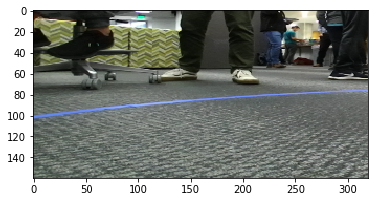

In [30]:
plt.imshow(cv2.cvtColor(images[-1], cv2.COLOR_BGR2RGB))

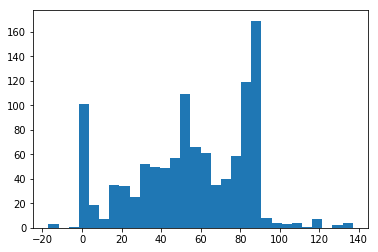

In [46]:
plt.hist(labels,bins=30);

In [38]:
def reverse(image, label, offset = 20):
    """offset: correct for positioning of left vs right cameras
        ex: a flip from left camera should be reduced in angle? """
    return cv2.flip(image, flipCode=1), -label + -offset

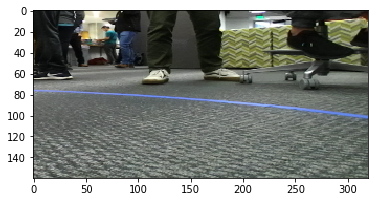

In [41]:
plt.imshow(cv2.cvtColor(reverse(images[-1], 100)[0], cv2.COLOR_BGR2RGB))

In [ ]:
def main():
    parser = argparse.ArgumentParser(description='[image preprocessing]  choose bag')
    parser.add_argument("path", type=str, help="path to bag")
    args = parser.parse_args()

    data, labels = get_data(args.path)


if __name__ == '__main__':
    main()